### Wprowadzenie do materiałów kompozytowych

Materiały kompozytowe to materiały składające się z dwóch lub więcej różnorodnych składników, które, będąc połączone, zachowują swoje odrębne charakterystyki, jednocześnie przyczyniając się do lepszych właściwości całości. Wykorzystuje się je ze względu na ich unikalne cechy, które można dostosować do specyficznych zastosowań. Materiały kompozytowe znajdują zastosowanie w lotnictwie, motoryzacji oraz wielu innych sektorach przemysłu i techniki. Zrozumienie mikrostruktury tych materiałów jest kluczowe dla analizy ich wydajności i trwałości.

### Cel analizy mikrostruktury stali 3CrMo4-5

W tym projekcie skupiono się na analizie mikrostruktury stali kotłowej 3CrMo4-5, która jest często używana w przemyśle ze względu na swoje właściwości wytrzymałościowe i odporność na wysokie temperatury. Badanie to pozwala zrozumieć jak rozkład i charakterystyka wytrąceń oraz granic ziaren wpływają na jej właściwości mechaniczne oraz przewidywać jego zachowanie w ekstremalnych warunkach użytkowania. W projekcie wykorzystano zdjęcie mikrostruktury stali 3CrMo4-5 o rozdzielczości 709x530 pikseli, gdzie 55 pikseli odpowiada 10 mikrometrom. Obraz ten został uzyskany za pomocą skanowania elektronowego, co pozwala na szczegółową obserwację wytrąceń węglika. Te węgliki, obecne zarówno wewnątrz jak i na granicach ziaren, wpływają znacząco na właściwości mechaniczne stali, w tym na jej twardość oraz odporność na pękanie.

### Przygotowanie danych do analizy

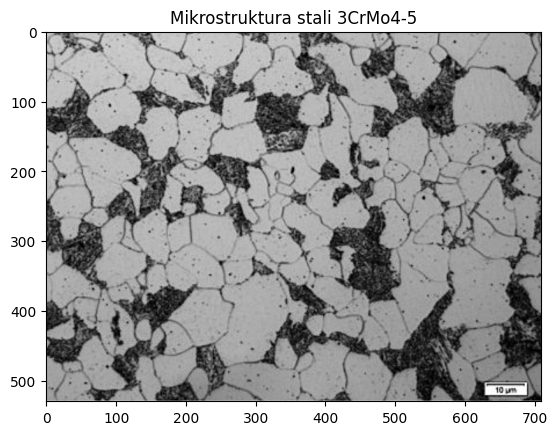

In [1]:
#Importowanie niezbędnych pakietów
from matplotlib import pyplot as plt
import cv2
import numpy as np

# Wczytanie i wyświetlenie oryginalnego obrazu mikrostruktury
steel = cv2.imread("C:\\Users\\aniag\\Desktop\\composites\\steel.png")
if steel is None:
    raise ValueError("Nie udało się wczytać obrazu steel.png. Sprawdź ścieżkę do pliku.")
plt.imshow(cv2.cvtColor(steel, cv2.COLOR_BGR2RGB))
plt.imshow( steel)
plt.title("Mikrostruktura stali 3CrMo4-5")
plt.show()

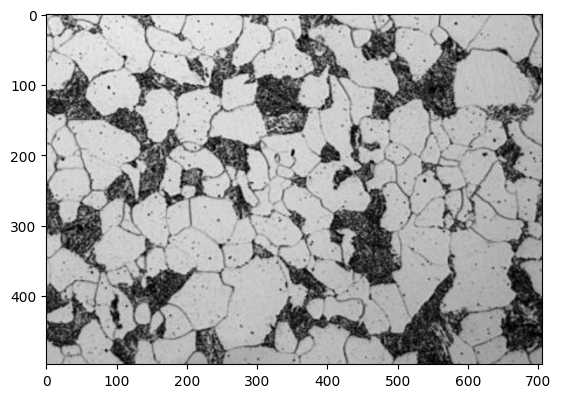

True

In [2]:
# Przycinanie i konwersja obrazu do skali szarości
image = cv2.imread("C:\\Users\\aniag\\Desktop\\composites\\steel.png", cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Nie udało się wczytać obrazu steel.png w skali szarości. Sprawdź ścieżkę do pliku.")
steel_cropped = image[2:500, 2:708]
plt.imshow(steel_cropped, cmap='gray')
plt.show()

# Zapisywanie przyciętego obrazu
cv2.imwrite("C:\\Users\\aniag\\Desktop\\composites\\steel_cropped.png", steel_cropped)

### Wytrącenia w mikrostrukturze stali

Wytrącenia, czyli mikroskopijne cząstki innej fazy, która w metalurgii oznacza odrębny, jednorodny składnik materialny o charakterystycznej strukturze i właściwościach, wydzielają się z roztworu stałego. Te cząstki odgrywają kluczową rolę w procesie hartowania stali i innych procesach termicznych. W przypadku stali 3CrMo4-5, obserwuje się wytrącenia węglików, które mogą tworzyć tzw. „łańcuchy” na granicach ziaren. Te struktury mają istotny wpływ na mikro-twardość oraz odporność na ścieranie stali, co jest istotne w wielu zastosowaniach przemysłowych.

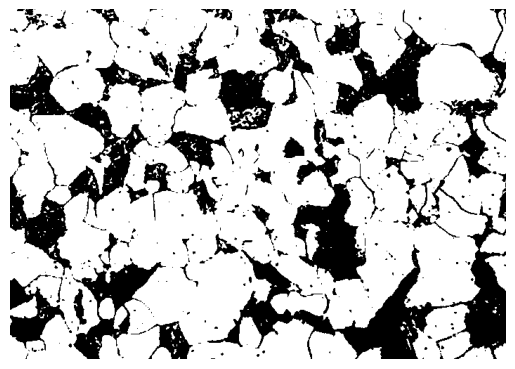

In [3]:
# Wczytywanie przyciętego obrazu do dalszego przetwarzania
img = cv2.imread("C:\\Users\\aniag\\Desktop\\composites\\steel_cropped.png", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Nie udało się wczytać przyciętego obrazu. Sprawdź ścieżkę do pliku.")

# Binarnizacja obrazu dla wyodrębnienia wytrąceń
thresh = 115 # dobór progu
img[img > thresh] = 255
img[img <= thresh] = 0

# Wyświetlanie wyniku progowania
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

W ramach przetworzenia obrazu binarnego, wykonano operację morfologicznego otwarcia, polegającą na dylatacji zastosowanej do wyniku erozji pierwotnego obrazu. Ta sekwencja operacji morfologicznych pomaga w eliminacji drobnych, odizolowanych elementów oraz w wygładzaniu krawędzi głównych obiektów na obrazie. W analizowanym przypadku, gdzie obiekty na obrazie są czarne a tło białe, proces ten wymagał najpierw zastosowania dylatacji, a potem erozji, co odpowiada operacji otwarcia na negatywie obrazu.

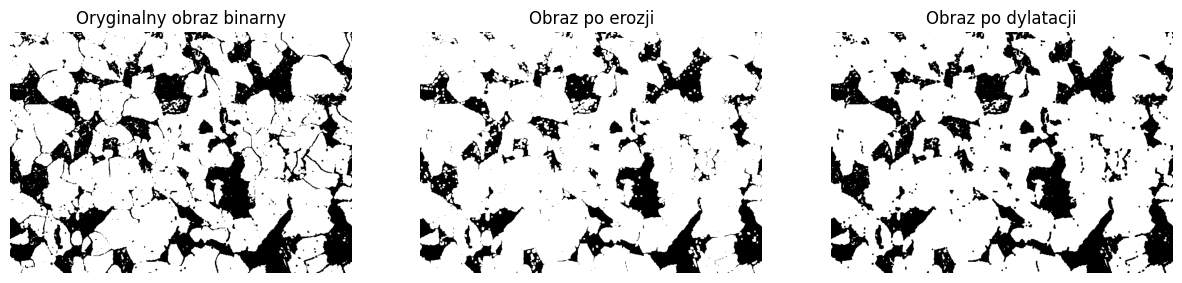

In [4]:
# Definicja jądra dla operacji morfologicznych
kernel = np.ones((3,3), np.uint8)

# Erozja
erosion = cv2.dilate(img, kernel, iterations=1)
# Dylatacja
inclusions = cv2.erode(erosion, kernel, iterations=1)

# Wyświetlanie obrazów
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img, cmap='gray')
axs[0].title.set_text('Oryginalny obraz binarny')
axs[0].axis('off')

axs[1].imshow(erosion, cmap='gray')
axs[1].title.set_text('Obraz po erozji')
axs[1].axis('off')

axs[2].imshow(inclusions, cmap='gray')
axs[2].title.set_text('Obraz po dylatacji')
axs[2].axis('off')

plt.show()

### Detekcja granic ziaren

Wykrywanie granic ziaren zostało przeprowadzone z wykorzystaniem algorytmu Canny'ego, który jest stosowany do detekcji krawędzi. Parametry dla tego algorytmu zostały dobrane metodą prób i błędów. Chociaż algorytm Canny'ego sam w sobie zawiera etap rozmycia, dla zwiększenia skuteczności wykrywania krawędzi, dodatkowo zastosowano wcześniej rozmycie Gaussa.

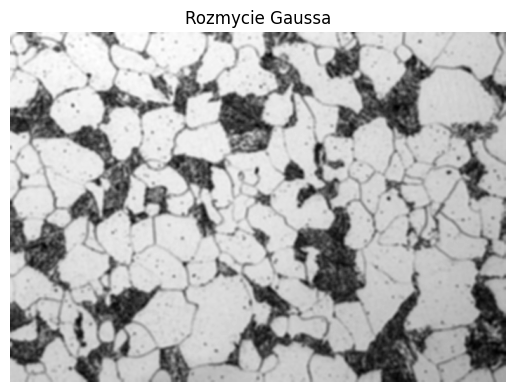

In [5]:
# Rozmycie obrazu
blur = cv2.GaussianBlur(src=steel_cropped, ksize=(5, 5), sigmaX=3)
plt.imshow(blur, cmap='gray')
plt.axis('off')
plt.title('Rozmycie Gaussa')
plt.axis('off')
plt.show()

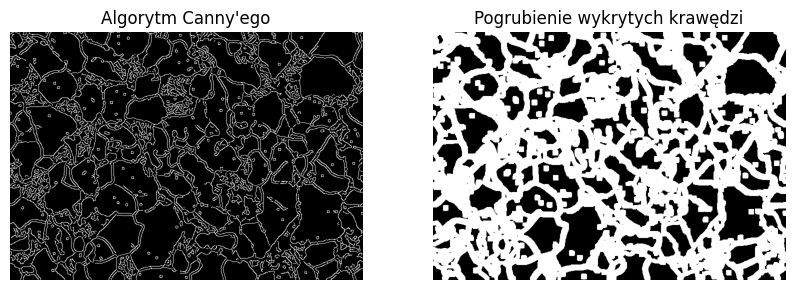

In [6]:
# Detekcja krawędzi metodą Canny'ego
edges = cv2.Canny(blur, 30, 90)

# Pogrubienie krawędzi
edges_d = cv2.dilate(edges, kernel, iterations = 3)

# Wyświetlanie obrazów
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(edges, cmap='gray')
axs[0].title.set_text('Algorytm Canny\'ego')
axs[0].axis('off')

axs[1].imshow(edges_d, cmap='gray')
axs[1].title.set_text('Pogrubienie wykrytych krawędzi')
axs[1].axis('off')

plt.show()

Następnie zastosowano operację szkieletyzacji (SKIZ), która redukuje granice ziaren do grubości pojedynczego piksela, ułatwiając analizę ich struktury. W wyniku tej operacji obraz granic ziaren zawierał jednak liczne nadmiarowe linie. W celu ich eliminacji przeprowadzono operację domknięcia, polegającą na dylatacji i erozji, co pozwoliło usunąć niepożądane artefakty. Kolejne zastosowanie operacji SKIZ pozwoliło uzyskać poprawiony i dokładny obraz granic ziaren.

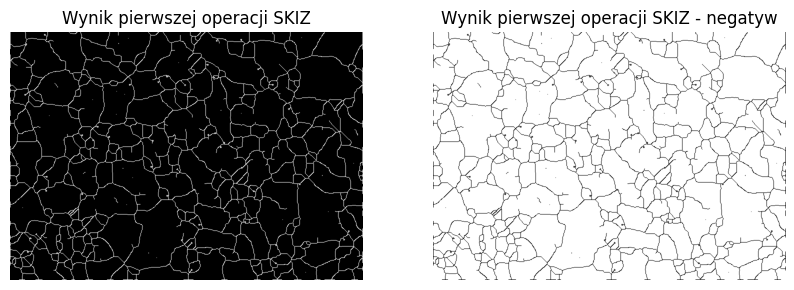

In [7]:
# Szkieletyzacja
skeleton = cv2.ximgproc.thinning(edges_d, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)

# Negatyw obrazu
inv_skeleton = cv2.bitwise_not(skeleton)

# Wyświetlanie obrazów
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(skeleton, cmap='gray')
axs[0].title.set_text('Wynik pierwszej operacji SKIZ')
axs[0].axis('off')

axs[1].imshow(inv_skeleton, cmap='gray')
axs[1].title.set_text('Wynik pierwszej operacji SKIZ - negatyw')
axs[1].axis('off')

plt.show()

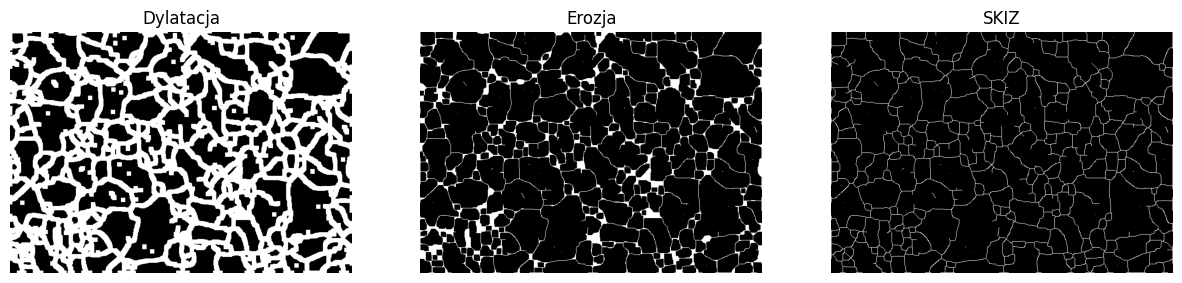

In [8]:
# Dylatacja 
skeleton_d = cv2.dilate(skeleton, kernel, iterations = 4)

#Erozja
skeleton_e = cv2.erode(skeleton_d, kernel, iterations = 4)

#Druga operacja SKIZ
skeleton_2 = cv2.ximgproc.thinning(skeleton_e, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)

# Wyświetlanie obrazów
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(skeleton_d, cmap='gray')
axs[0].title.set_text('Dylatacja')
axs[0].axis('off')

axs[1].imshow(skeleton_e, cmap='gray')
axs[1].title.set_text('Erozja')
axs[1].axis('off')

axs[2].imshow(skeleton_2, cmap='gray')
axs[2].title.set_text('SKIZ')
axs[2].axis('off')

plt.show()

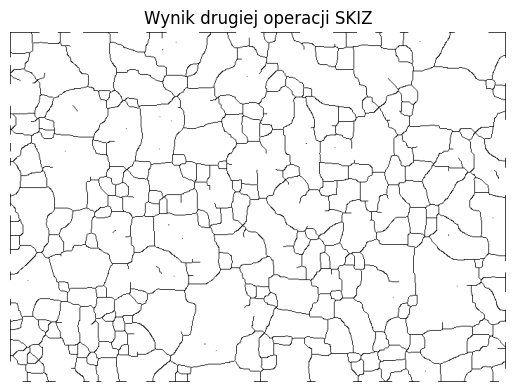

In [9]:
#Negatyw obrazu
inv_skeleton_2 = cv2.bitwise_not(skeleton_2)
plt.imshow(inv_skeleton_2, cmap='gray')
plt.title('Wynik drugiej operacji SKIZ')
plt.axis('off')
plt.show()

### Ostateczne wyniki przetwarzania obrazu

Ostatnim krokiem analizy było połączenie uzyskanego wcześniej obrazu wytrąceń z obrazem granic ziaren za pomocą operacji logicznej AND.

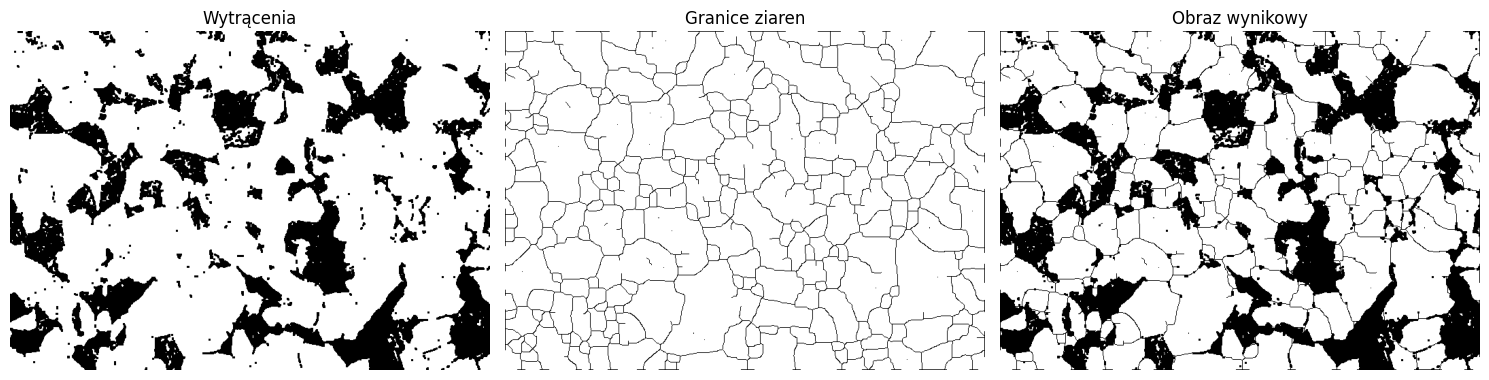

In [10]:
# Łączenie obrazów granic ziaren z wytrąceniami
result = cv2.bitwise_and(inv_skeleton_2, inclusions)

# Wyświetlanie obrazów
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(inclusions, cmap='gray')
axs[0].set_title('Wytrącenia')
axs[0].axis('off')

axs[1].imshow(inv_skeleton_2, cmap='gray')
axs[1].set_title('Granice ziaren')
axs[1].axis('off')

axs[2].imshow(result, cmap='gray')
axs[2].set_title('Obraz wynikowy')
axs[2].axis('off')

plt.tight_layout()
plt.show()

Otrzymany obraz wynikowy stanowi podstawę do dalszych, bardziej szczegółowych analiz. Umożliwia przeprowadzenie różnorodnych badań, które mogą obejmować między innymi kwantyfikację porowatości i rozkładu fazy w materiale, analizę wielkości i rozmieszczenia ziaren oraz wytrąceń, a także badania nad korelacją tych cech mikrostrukturalnych z właściwościami mechanicznymi stali, takimi jak twardość, wytrzymałość na rozciąganie i odporność na zmęczenie. Ponadto, zaawansowane metody analizy obrazu, takie jak analiza tekstury czy automatyczne rozpoznawanie wzorców, mogą zostać wykorzystane do identyfikacji i klasyfikacji różnych typów mikrostruktur, co jest kluczowe w procesie optymalizacji procesów obróbki cieplnej oraz w projektowaniu nowych stopów stalowych o pożądanych właściwościach. Wszystkie te analizy przyczyniają się do głębszego zrozumienia i lepszego wykorzystania materiałów w praktycznych aplikacjach przemysłowych.

### Bibliografia

1. Gwoździk M., "Structure studies of porous oxide layers formed on 13CrMo4-5 steels long-term operated in the power industry", Technical Sciences / University of Warmia and Mazury in Olsztyn, 2016, nr 19(3)
2. Leszek Wojnar, Krzysztof J. Kurzydłowski, Janusz Szala, "Praktyka analizy obrazu", Polskie Towarzystwo Stereologiczne, 2002